# `Fields of Plenty: Examining Opportunities and Challenges in African Food Production`

![Alt Text](Production.jpg)

#  `Deliverables`

Your report should contain visualisation and narratives. To aid your report, you need to consider the following requirements in addition to your own considerations:

1. Trends in food production and consumption over the years.
2. Average and median food production, the outliers, Quartile and interquartile ranges. (preferably a Boxplot) .
3. A comparison between average food consumption and production for each year.<br>

In [11]:
## Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display
import scipy.stats

# Food Production Dataset

In [3]:
## Loading the Food Production Dataset

food_production = pd.read_csv("Africa Food Production (2004 - 2013).csv")
food_production.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [4]:
food_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [21]:
## Changing the Year column into datetime format since its an Interger
food_production['Year'] = pd.to_datetime(food_production['Year'], format='%Y-%m-%d')


In [22]:
## Confirming if the Year column is in the corect format

food_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Country  23110 non-null  object        
 1   Item     23110 non-null  object        
 2   Year     23110 non-null  datetime64[ns]
 3   Value    23110 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 722.3+ KB


In [23]:
food_production.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004-01-01,2731
1,Algeria,Wheat and products,2005-01-01,2415
2,Algeria,Wheat and products,2006-01-01,2688
3,Algeria,Wheat and products,2007-01-01,2319
4,Algeria,Wheat and products,2008-01-01,1111


In [6]:
food_production.shape

(23110, 4)

In [7]:
food_production.describe()

,Year,Value
count,23110.000000,23110.000000
mean,2008.498269,327.785201
std,2.871740,1607.940343
min,2004.000000,0.000000
25%,2006.000000,3.000000
50%,2008.000000,18.000000
75%,2011.000000,108.000000
max,2013.000000,54000.000000


In [8]:
## Checking for the null values

food_production.isnull().sum()

Country    0
Item       0
Year       0
Value      0
dtype: int64

In [13]:
print("Number of Countries:")
## Checking for how many countries are in the dataframe
food_production["Country"].nunique()

Number of Countries:


45

## Grouping the dataset

In [29]:
food_production_grped = food_production.groupby(['Country','Item','Year'])["Value"].sum()
food_production_grped=pd.DataFrame(food_production_grped)
food_production_grped.head(20)

Value
Country Item                Year             
Algeria Apples and products 2004-01-01    165
                            2005-01-01    200
                            2006-01-01    283
                            2007-01-01    190
                            2008-01-01    261
                            2009-01-01    267
                            2010-01-01    379
                            2011-01-01    404
                            2012-01-01    398
                            2013-01-01    456
        Bananas             2004-01-01      0
                            2005-01-01      0
                            2006-01-01      0
                            2007-01-01      0
                            2008-01-01      0
                            2009-01-01      0
                            2010-01-01      0
                            2011-01-01      0
                            2012-01-01      0
                            2013-01-01      0

In [33]:
foodproduc_df = food_production.groupby(['Country','Year'])["Value"].sum().reset_index()
foodproduc_df=pd.DataFrame(foodproduc_df)
foodproduc_df.head(20)

,Country,Year,Value
0,Algeria,2004-01-01,15536
1,Algeria,2005-01-01,15667
2,Algeria,2006-01-01,16417
3,Algeria,2007-01-01,14763
4,Algeria,2008-01-01,13841
5,Algeria,2009-01-01,19820
6,Algeria,2010-01-01,20263
7,Algeria,2011-01-01,21778
8,Algeria,2012-01-01,24206
9,Algeria,2013-01-01,26359


In [34]:
foodproduc_df.shape

(450, 3)

# Food Supply Dataset

In [59]:
food_supply = pd.read_csv("Africa Food Supply (2004 - 2013).csv")
food_supply.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [83]:
food_supply.shape

(450, 3)

In [60]:
food_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [61]:
## Changing the year column into datetime
food_supply['Year'] = pd.to_datetime(food_supply['Year'], format='%Y')

# Display the updated DataFrame information
food_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Country  450 non-null    object        
 1   Year     450 non-null    datetime64[ns]
 2   Value    450 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.7+ KB


In [62]:
food_supply.isnull().sum()

Country    0
Year       0
Value      0
dtype: int64

In [66]:
## Doing a groupby for the food consumption
food_supply.groupby(["Country", "Year"])["Value"].sum()
food_supply_df= pd.DataFrame(food_supply)
food_supply_df

,Country,Year,Value
0,Algeria,2004-01-01,2987
1,Algeria,2005-01-01,2958
2,Algeria,2006-01-01,3047
3,Algeria,2007-01-01,3041
4,Algeria,2008-01-01,3048
...,...,...,...
445,Zimbabwe,2009-01-01,2147
446,Zimbabwe,2010-01-01,2168
447,Zimbabwe,2011-01-01,2200
448,Zimbabwe,2012-01-01,2197


## `Deliverable 1.a : A Trends in food production over the years.`

* Here, I used a line graph to demonstrate the trend in food production over the years

<ipython-input-54-4a8bb042ec64>:4: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



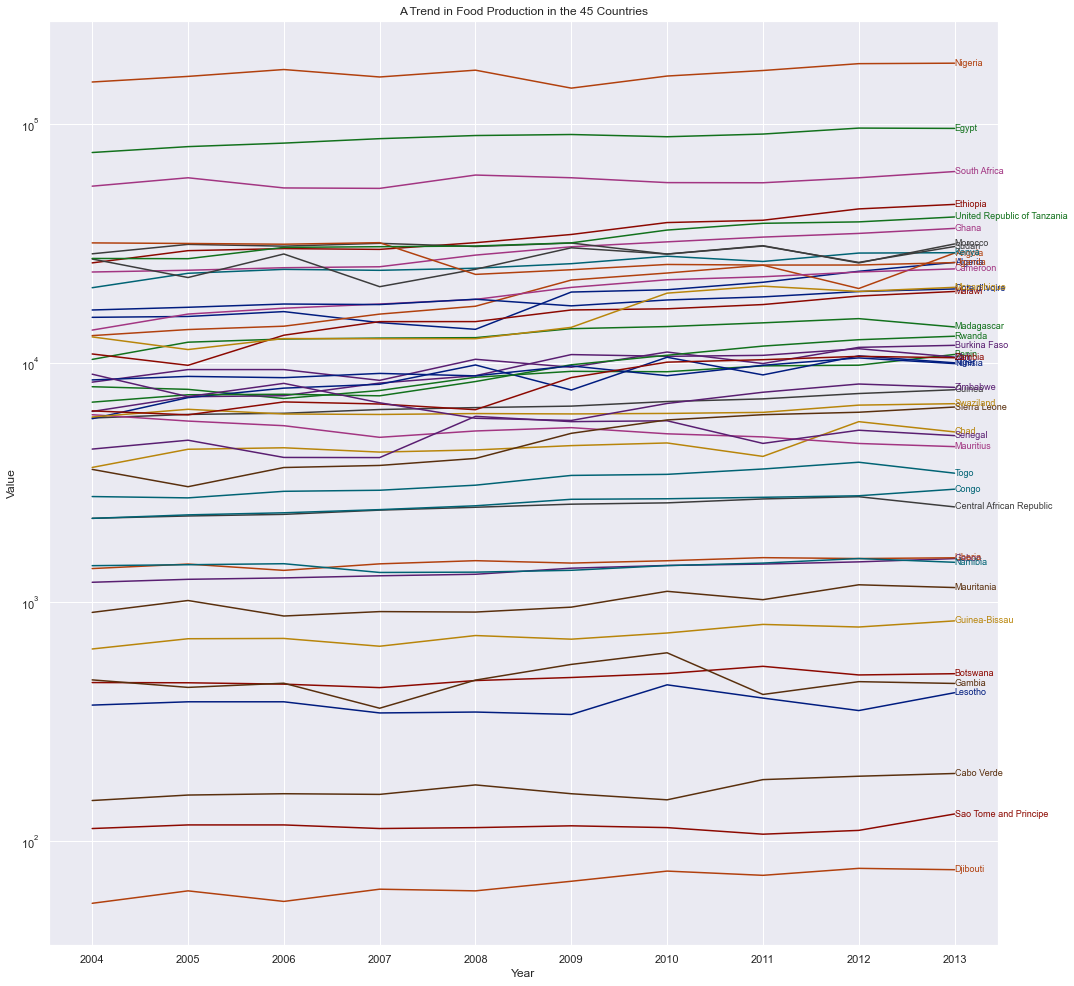

In [54]:
sns.set(rc = {'figure.figsize':(17,17)})
proddatasetlp = sns.lineplot(x  ='Year', y = 'Value', hue = 'Country', palette = 'dark', data = foodproduc_df, legend=False)
proddatasetlp.set(yscale = 'log')
proddatasetlp.set(Title =  'A Trend in Food Production in the 45 Countries')

# Adding the country names on the lines
for line, label in zip(proddatasetlp.lines, foodproduc_df['Country'].unique()):
    x_data, y_data = line.get_xydata().T
    if x_data.size > 0:
        plt.text(x_data[-1], y_data[-1], label, color=line.get_color(), fontsize=9, ha='left', va='center')

plt.show()


`Observation:`

* We can clearly see that the top 3 countries leading in food production over the years are : Nigeria, Egypt and South Africa
  
* The bottom 3 countries when it comes to food production in Africa over the years are : Djibouti, Sao Tome and Principe and Cabo Verde


* The high food production in Nigeria, Egypt, and South Africa can be attributed to a combination of favorable climate conditions, diverse and advanced agricultural practices, supportive government policies, continuous technological advancements, and well-developed infrastructure.
  
* The lower food production levels observed in Djibouti, Sao Tome and Principe, and Cabo Verde can be linked to a combination of geographical constraints, limited agricultural practices, and challenges in infrastructure development

### `Food Production Over the Years`

In [77]:
pd.DataFrame(foodproduc_df.groupby(['Year'])['Value'].sum().reset_index())

,Year,Value
0,2004,663006
1,2005,691257
2,2006,718602
3,2007,705659
4,2008,736804
5,2009,746870
6,2010,786466
7,2011,812214
8,2012,841667
9,2013,872571


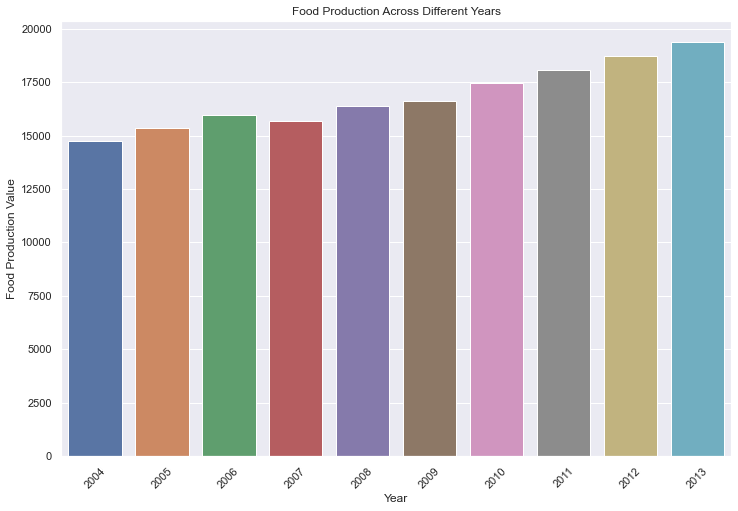

In [69]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Value', data=foodproduc_df, ci=None)  # Set ci=None to remove error bars
plt.title('Food Production Across Different Years')
plt.xlabel('Year')
plt.ylabel('Food Production Value')
plt.xticks(rotation=45)

plt.show()

`Observation:`

* The year 2013 stands out as the peak production year, reaching the highest total food production of 872,571 units.


* Conversely, the year 2004 reflects the lowest production during the specified period, with a total of 663,006 units.

## A Map representation of the Countries

In [45]:
foodproduc_df['Year'] = pd.to_datetime(foodproduc_df['Year'], format='%Y-%m-%d')
foodproduc_df['Year'] = foodproduc_df['Year'].dt.strftime('%Y')


# Plot the choropleth map
foodproddatasetmap = px.choropleth(
    foodproduc_df,
    locations="Country",
    locationmode='country names',
    color="Value",
    hover_name="Country",
    animation_frame='Year',  # Use the formatted Year column for animation
    scope='africa',
    title='Food Production by Country'
)

foodproddatasetmap.show()

## `Deliverable 1.b: A Trend in food supply over the years.`

* Here, I used a line graph to demonstrate the trend in food consumption over the years

<ipython-input-65-9e29754051d7>:4: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



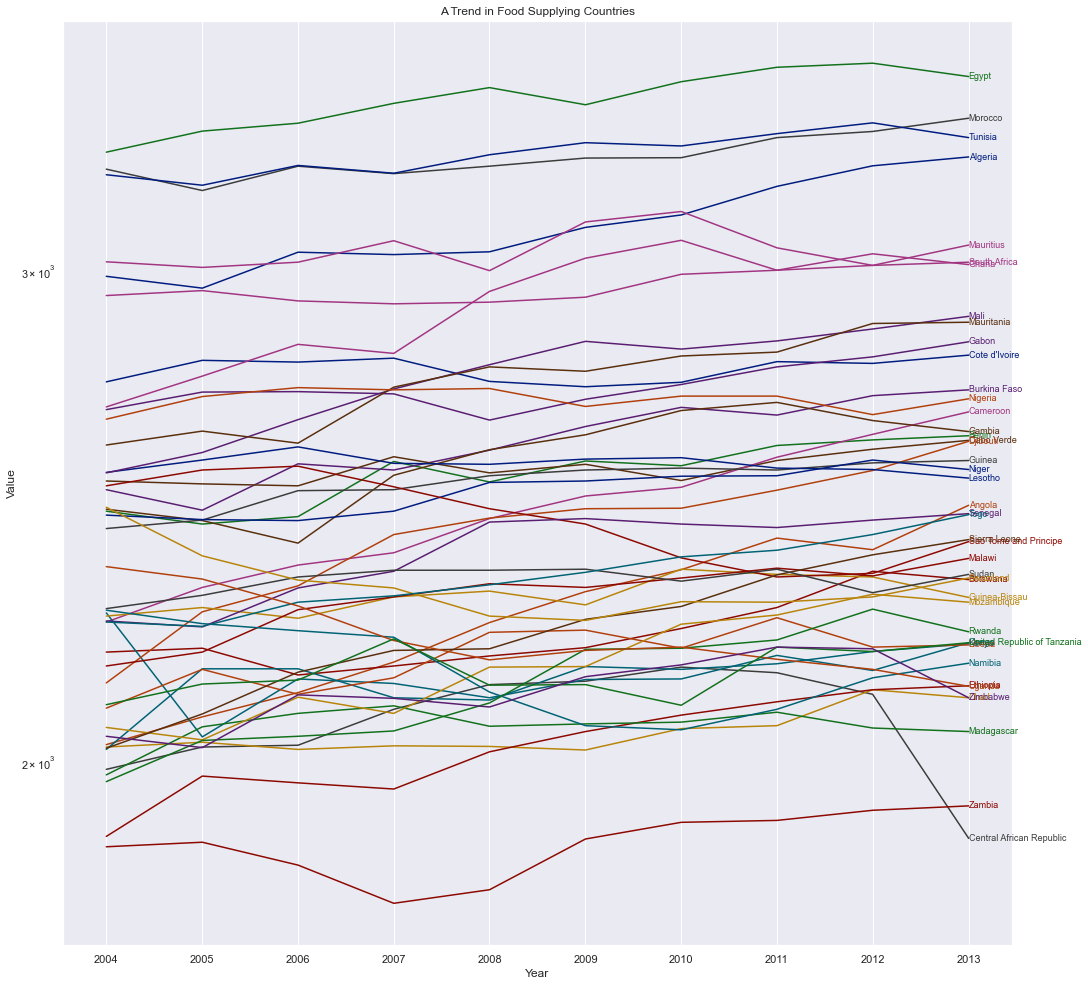

In [65]:
sns.set(rc = {'figure.figsize':(17,17)})
supplydatasetlp = sns.lineplot(x  ='Year', y = 'Value', hue = 'Country', palette = 'dark', data = food_supply_df, legend=False)
supplydatasetlp.set(yscale = 'log')
supplydatasetlp.set(Title =  'A Trend in Food Supplying Countries')

# Adding the country names on the lines
for line, label in zip(supplydatasetlp.lines, food_supply_df['Country'].unique()):
    x_data, y_data = line.get_xydata().T
    if x_data.size > 0:
        plt.text(x_data[-1], y_data[-1], label, color=line.get_color(), fontsize=9, ha='left', va='center')

plt.show()

`Observations:`

* We can clearly see that the top 3 countries leading in food supply over the years are : Egypt, Morocco and Tunisia.
  
* The bottom 3 countries when it comes to food supply in Africa over the years are : Central African Republic, Zambia and Madagascar.

* Egypt, Morocco, and Tunisia have consistently led in food supply in Africa, benefiting from favorable geographic conditions, advanced agricultural practices, government support, and technological advancements.
  
* Egypt's mastery of Nile River resources, Morocco's commitment to modernizing agriculture, and Tunisia's strategic policies have positioned them as key contributors to the continent's food supply.
  
* The Central African Republic, Zambia, and Madagascar face challenges in food supply, possibly influenced by factors such as geopolitical issues, economic challenges, climate variability, and limited access to modern farming practices.
  
* Geopolitical instability, economic challenges, and susceptibility to natural disasters are among the factors impacting the agricultural sectors of the Central African Republic, Zambia, and Madagascar.

### `Food Supply Over the Years`

In [80]:
food_supply_df['Year'] = pd.to_datetime(food_supply_df['Year']).dt.year

In [88]:
new_supply_df= pd.DataFrame(food_supply_df.groupby(['Year'])['Value'].sum().reset_index())
new_supply_df

,Year,Value
0,2004,107740
1,2005,108418
2,2006,109386
3,2007,110149
4,2008,110734
5,2009,111700
6,2010,112383
7,2011,113194
8,2012,113744
9,2013,113951


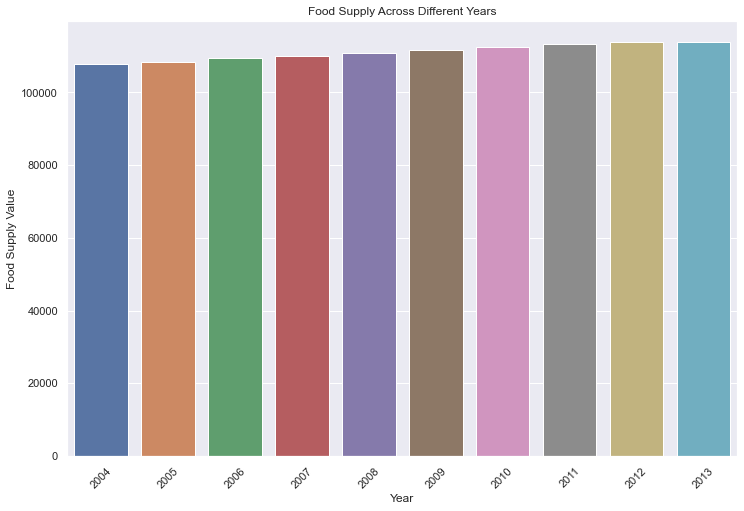

In [89]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Value', data=new_supply_df, ci=None)  # Set ci=None to remove error bars
plt.title('Food Supply Across Different Years')
plt.xlabel('Year')
plt.ylabel('Food Supply Value')
plt.xticks(rotation=45)

plt.show()

`Observation:`

* The supply of food has demonstrated a consistent upward trend over the years, with quantities increasing from 107,740 units in 2004 to a peak of 113,951 units in 2013. 


* This progressive growth suggests positive developments in agricultural practices, technological advancements, or improvements in the distribution and logistics of food resources. 

* The observed trend indicates a promising trajectory in ensuring sustained and efficient food supply chains, highlighting the potential impact of various factors contributing to increased food availability.

### `Deliverable 2: Average and median food production, the outliers, Quartile and interquartile ranges. (preferably a Boxplot) `

### 1. Calculating the average of food production using the Year

In [96]:
avg_production = foodproduc_df.groupby('Year')['Value'].mean().reset_index()
avg_production

,Year,Value
0,2004,14733.466667
1,2005,15361.266667
2,2006,15968.933333
3,2007,15681.311111
4,2008,16373.422222
5,2009,16597.111111
6,2010,17477.022222
7,2011,18049.200000
8,2012,18703.711111
9,2013,19390.466667


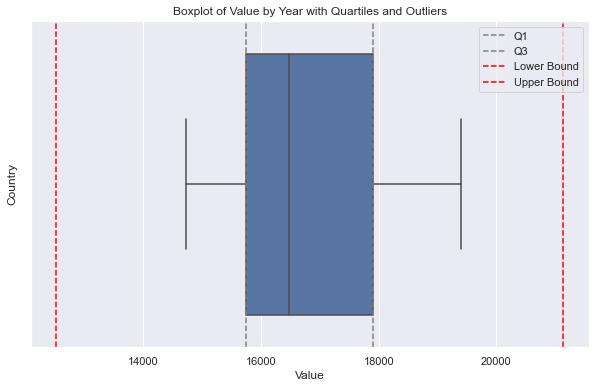

In [133]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x='Value', data=avg_production)

# Add quartile and interquartile range annotations
Q1 = avg_production['Value'].quantile(0.25)
Q3 = avg_production['Value'].quantile(0.75)
IQR = Q3 - Q1

plt.axvline(Q1, color='gray', linestyle='--', label='Q1')
plt.axvline(Q3, color='gray', linestyle='--', label='Q3')
plt.axvline(Q1 - 1.5 * IQR, color='red', linestyle='--', label='Lower Bound')
plt.axvline(Q3 + 1.5 * IQR, color='red', linestyle='--', label='Upper Bound')

# Add outlier annotations
outliers = avg_production[(avg_production['Value'] > Q3 + 1.5 * IQR) | (avg_production['Value'] < Q1 - 1.5 * IQR)]

# Add labels and title
plt.title('Boxplot of Value by Year with Quartiles and Outliers')
plt.xlabel('Value')
plt.ylabel('Country')
plt.legend()
plt.show()

### 2. Calculating the average of food production using Country Column

In [99]:
avg_prod_country = foodproduc_df.groupby('Country')['Value'].mean().reset_index()
avg_prod_country.head()

,Country,Value
0,Algeria,18865.0
1,Angola,19549.9
2,Benin,8807.2
3,Botswana,480.8
4,Burkina Faso,10012.9


 * ### `Boxplot for the Average of food production using country column`

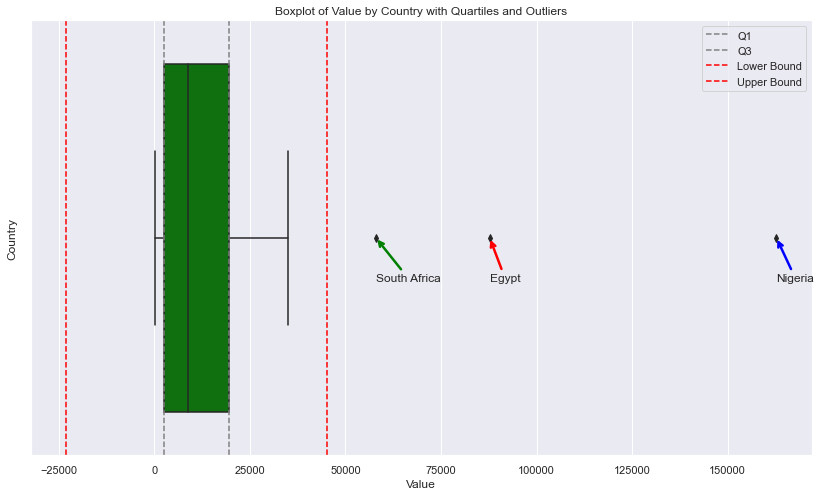

In [109]:
# Set the size of the plot
plt.figure(figsize=(14, 8))

# Create a box plot
sns.boxplot(x='Value', data=avg_prod_country, color='green')

# Add quartile and interquartile range annotations
Q1 = avg_prod_country['Value'].quantile(0.25)
Q3 = avg_prod_country['Value'].quantile(0.75)
IQR = Q3 - Q1

plt.axvline(Q1, color='gray', linestyle='--', label='Q1')
plt.axvline(Q3, color='gray', linestyle='--', label='Q3')
plt.axvline(Q1 - 1.5 * IQR, color='red', linestyle='--', label='Lower Bound')
plt.axvline(Q3 + 1.5 * IQR, color='red', linestyle='--', label='Upper Bound')

# Add outlier annotations
outliers = avg_prod_country[(avg_prod_country['Value'] > Q3 + 1.5 * IQR) | (avg_prod_country['Value'] < Q1 - 1.5 * IQR)]

arrow_colors = ['red', 'blue', 'green', 'purple']

for i, (country, value) in enumerate(outliers[['Country', 'Value']].values):
    arrow_color = arrow_colors[i % len(arrow_colors)]  # Cycle through colors
    plt.annotate(
        country, 
        xy=(value, 0), 
        xytext=(value, 0.1), 
        arrowprops={'arrowstyle': '->', 'lw': 2.5, 'color': arrow_color}
    )

# Add labels and title
plt.title('Boxplot of Value by Country with Quartiles and Outliers')
plt.xlabel('Value')
plt.ylabel('Country')
plt.legend()
plt.show()

### 3. Calculating the Median of food production using Country Column

In [112]:
median_prod_country = foodproduc_df.groupby('Country')['Value'].median().reset_index()
median_prod_country.head()

,Country,Value
0,Algeria,18118.5
1,Angola,18896.5
2,Benin,8961.5
3,Botswana,477.0
4,Burkina Faso,9780.5


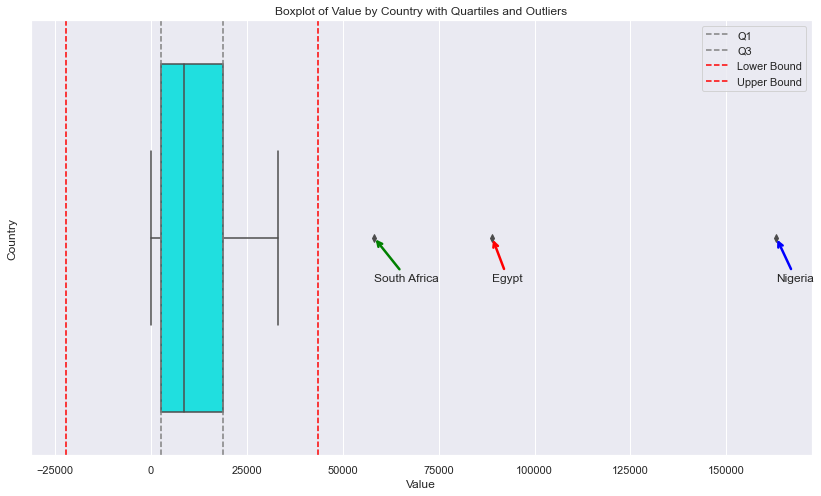

In [113]:
# Set the size of the plot
plt.figure(figsize=(14, 8))

# Create a box plot
sns.boxplot(x='Value', data=median_prod_country, color='cyan')

# Add quartile and interquartile range annotations
Q1 = median_prod_country['Value'].quantile(0.25)
Q3 = median_prod_country['Value'].quantile(0.75)
IQR = Q3 - Q1

plt.axvline(Q1, color='gray', linestyle='--', label='Q1')
plt.axvline(Q3, color='gray', linestyle='--', label='Q3')
plt.axvline(Q1 - 1.5 * IQR, color='red', linestyle='--', label='Lower Bound')
plt.axvline(Q3 + 1.5 * IQR, color='red', linestyle='--', label='Upper Bound')

# Add outlier annotations
outliers = median_prod_country[(median_prod_country['Value'] > Q3 + 1.5 * IQR) | (median_prod_country['Value'] < Q1 - 1.5 * IQR)]

arrow_colors = ['red', 'blue', 'green', 'purple']

for i, (country, value) in enumerate(outliers[['Country', 'Value']].values):
    arrow_color = arrow_colors[i % len(arrow_colors)]  # Cycle through colors
    plt.annotate(
        country, 
        xy=(value, 0), 
        xytext=(value, 0.1), 
        arrowprops={'arrowstyle': '->', 'lw': 2.5, 'color': arrow_color}
    )

# Add labels and title
plt.title('Boxplot of Value by Country with Quartiles and Outliers')
plt.xlabel('Value')
plt.ylabel('Country')
plt.legend()
plt.show()


**Insights Drawn from the average and Median BoxPlots**

1. *Egypt's Profile:*
   - The alignment between median and mean values in Egypt places it at the statistical heart of the dataset.

2. *Nigeria's Distinctiveness:*
   - Nigeria emerges as a standout with notably higher values, positioned as an outlier beyond the typical range depicted by the boxplot whiskers.
   - This outlier status signals a considerable deviation from the majority of countries in the dataset.

3. 
   - Beyond individual country observations, the boxplot serves as a visual compass, revealing the distribution's breadth, central tendencies, and instances of deviation.
   - Egypt and South Africa represent the norm, while Nigeria's exceptional position adds nuance to the dataset.
   - The boxplot's elongated upper whisker signals heightened variability in higher 'Value' variable values among the 45 countries.
   - This distribution asymmetry suggests potential outliers or a skew towards elevated values in the dataset.

### `Deliverable 3: A comparison between average food consumption and production for each year.<br>`

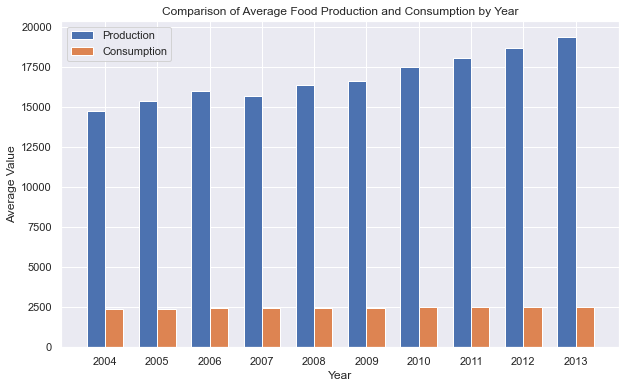

In [95]:

# Calculate average production and consumption for each year
avg_production = foodproduc_df.groupby('Year')['Value'].mean().reset_index()
avg_supply= food_supply_df.groupby('Year')['Value'].mean().reset_index()
# Convert 'Year' to string in both DataFrames
avg_production['Year'] = avg_production['Year'].astype(str)
avg_supply['Year'] = avg_supply['Year'].astype(str)

# Merge the two DataFrames on 'Year'
merged_df = pd.merge(avg_production, avg_supply, on='Year', suffixes=('_Production', '_Consumption'))

# Plotting
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(merged_df['Year']))

plt.bar(index, merged_df['Value_Production'], bar_width, label='Production')
plt.bar(index + bar_width, merged_df['Value_Consumption'], bar_width, label='Consumption')

plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Comparison of Average Food Production and Consumption by Year')
plt.xticks(index + bar_width / 2, merged_df['Year'])
plt.legend()

plt.show()

#### `Observation:`


1. **Production and Consumption Trends:** Both food production and consumption have generally increased over the years (2004 to 2013), indicating a potential growth in the agricultural and food sectors.

2. **Consistent Discrepancy:** Throughout the observed period, the average production values are consistently higher than the average consumption values. This suggests that, on average, the countries in consideration tend to produce more food than they consume, which could lead to surplus or export opportunities.

3. **Steady Production Growth:** The average production values show a steady upward trend, indicating an overall improvement in food production capabilities. This could be attributed to advancements in agricultural practices, technology, or other factors contributing to increased productivity.

4. **Slight Fluctuations in Consumption:** While production has been on a consistent rise, average consumption values show some fluctuations, suggesting that consumption patterns might be influenced by various factors such as population changes, economic conditions, or dietary trends.

5. **Potential for Export:** The consistent surplus in production compared to consumption suggests a potential for these countries to become food exporters, contributing to the global food market and potentially improving their economic standing.

6. **Yearly Patterns:** There seems to be a pattern of increased production and consumption from 2004 to 2013, indicating a positive correlation between the two variables. Understanding the reasons behind these trends can provide insights into the dynamics of the food market in these countries.



# `CONCLUSION`


1. **Disparities in Production:** There are significant disparities in food production across African countries. Some countries, such as Egypt, Morocco, and Tunisia, consistently lead in food production, while others, like Djibouti, Sao Tome and Principe, and Cabo Verde, face challenges in producing sufficient food.

2. **Regional Variances:** The analysis reveals regional variations in agricultural performance. Factors such as climate conditions, agricultural practices, government policies, and technological advancements contribute to these differences.

3. **Top and Bottom Performers:** Egypt, Morocco, and Tunisia consistently emerge as top performers in food production, while the Central African Republic, Zambia, and Madagascar face challenges in maintaining an adequate food supply.

4. **Production Trends Over Time:** Examining production trends over the years provides insights into the changing dynamics of food production. Understanding these trends can be crucial for making informed decisions related to agriculture, food security, and policy planning.

5. **Crops and Items:** Analyzing specific crops or food items, such as wheat, oats, and rice, allows for a more detailed understanding of production patterns. Identifying top producers for specific items helps in targeting interventions and support where needed.

6. **Consumption and Production Discrepancies:** Comparing food production with consumption highlights discrepancies that may lead to food shortages or surpluses. Addressing these discrepancies is essential for achieving food security.

7. **Outliers and Anomalies:** Identifying outliers in production data helps pinpoint countries or years with exceptional performance, which can be further investigated to understand the contributing factors.

8. **Interactive Tools for Exploration:** The use of interactive tools, such as GeoRegionValueplot and box plots, enhances the exploration of data and facilitates a deeper understanding of geographical and statistical aspects of food production.



# `RECOMMENDATION`

1. **Investment in Agricultural Infrastructure:** Governments and stakeholders should prioritize investments in agricultural infrastructure, including irrigation systems, storage facilities, and transportation networks. This will help improve the efficiency of the agricultural supply chain and reduce post-harvest losses.

2. **Technology Adoption:** Encourage the adoption of modern agricultural technologies, including precision farming, crop monitoring systems, and efficient irrigation methods. This can enhance productivity, optimize resource use, and mitigate the impact of climate-related challenges.

3. **Diversification of Crops:** Promote the diversification of crops to ensure a varied and balanced diet. Supporting farmers in cultivating a diverse range of crops can enhance food security and resilience to changing environmental conditions.

4. **Capacity Building:** Implement programs for training and capacity building among farmers. Providing knowledge on sustainable farming practices, pest control, and soil management can contribute to increased yields and improved agricultural practices.

5. **Government Policies for Agriculture:** Formulate and implement policies that support sustainable agricultural development. This includes providing subsidies for essential inputs, creating favorable trade policies, and ensuring access to credit for smallholder farmers.

6. **Research and Development:** Support research and development in agriculture to develop new crop varieties that are more resilient to climate change, diseases, and pests. This can contribute to increased yields and improved food production.

7. **Monitoring and Early Warning Systems:** Establish monitoring systems and early warning mechanisms to anticipate and respond to potential food shortages or surpluses. This can involve the use of technology, data analytics, and collaboration with international organizations.

8. **Promotion of Sustainable Practices:** Encourage and incentivize sustainable agricultural practices, such as organic farming, agroforestry, and conservation agriculture. These practices contribute to environmental sustainability and long-term food security.

9. **Collaboration and Knowledge Sharing:** Facilitate collaboration among African countries for knowledge sharing and best practices in agriculture. Regional cooperation can lead to the exchange of expertise, technologies, and resources for mutual benefit.

10. **Education and Awareness:** Promote education and awareness programs on sustainable agriculture, nutrition, and food security. Informed consumers and farmers are better equipped to make decisions that contribute to a more sustainable and resilient food system.



# QUESTIONS FROM THE QUIZ

Question 1 - Which three countries had the lowest food supply between 2004 and 2006 respectively(inclusive)?



In [126]:
print('Question 1')
# Filter for the years 2004 to 2006
filtered_df = food_supply_df[(food_supply_df['Year'] >= 2004) & (food_supply_df['Year'] <= 2006)]

# Group by country and calculate total food supply
total_food_supply = filtered_df.groupby('Country')['Value'].sum().reset_index()

# Sort by total food supply in ascending order
sorted_df = total_food_supply.sort_values(by='Value')

# Get the three countries with the lowest food supply
lowest_food_supply_countries = sorted_df.head(3)

print(lowest_food_supply_countries[['Country', 'Value']])


Question 1
                     Country  Value
43                    Zambia   5577
13                  Ethiopia   5827
7   Central African Republic   6044


Question 4 - Which country produced the highest amount of oats in 2010?

In [125]:
print('Question 4')

# Filter the data for oats and the year 2010
oats_2010 = food_production[(food_production['Item'] == 'Oats') & (food_production['Year'] == '2010-01-01')]

# Find the country with the highest production
if not oats_2010.empty:
    highest_oats_production_country = oats_2010.loc[oats_2010['Value'].idxmax()]
    print("Country with the highest oats production in 2010:")
    print(highest_oats_production_country[['Country', 'Value']])
else:
    print("No data available for oats production in 2010.")


Question 4
Country with the highest oats production in 2010:
Country    Algeria
Value           88
Name: 46, dtype: object


Question 5 - What three countries have produced the highest total quantities of rice from 2004 to 2013?

In [123]:
print('Question 5')

# Filtering data for rice items
rice_production = food_production[food_production['Item'] == 'Rice (Milled Equivalent)']

# Group the rice production data by country and sum the values
total_rice_production_by_country = rice_production.groupby('Country')['Value'].sum().reset_index()

# Sort the data in descending order to find the top three countries
top_rice_countries = total_rice_production_by_country.sort_values(by='Value', ascending=False).head(3)

print("Three countries with the highest total quantities of rice production (2004-2013):")
print(top_rice_countries[['Country', 'Value']])



Question 5
Three countries with the highest total quantities of rice production (2004-2013):
       Country  Value
9        Egypt  40370
26     Nigeria  26964
18  Madagascar  26118
